# Семинар 4. Визуализация данных.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Зачем вообще нужны графики?

![meh](https://d2f99xq7vri1nk.cloudfront.net/DinoSequentialSmaller.gif)

[красивые картинки](https://www.autodeskresearch.com/publications/samestats)

### Line Plots

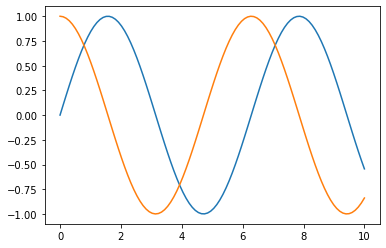

In [2]:
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()

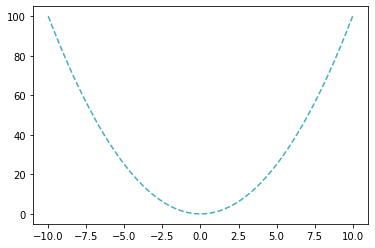

In [3]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(-10, 10, 1000)
ax.plot(x, x ** 2, color='#44AFC3', linestyle='dashed')

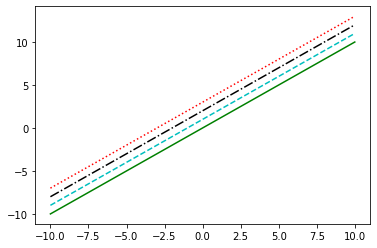

In [4]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

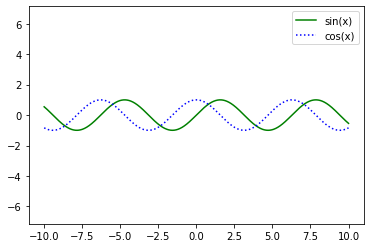

In [5]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend()

### Scatter Plots

In [6]:
plt.style.available

['tableau-colorblind10',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-white',
 'seaborn-whitegrid',
 'dark_background',
 'ggplot',
 'seaborn-dark-palette',
 'grayscale',
 '_classic_test',
 'seaborn-darkgrid',
 'seaborn-dark',
 'seaborn-muted',
 'fast',
 'seaborn-ticks',
 'seaborn-deep',
 'seaborn-talk',
 'Solarize_Light2',
 'seaborn-paper',
 'seaborn',
 'bmh',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-notebook',
 'classic',
 'fivethirtyeight']

In [0]:
plt.style.use('seaborn-whitegrid')

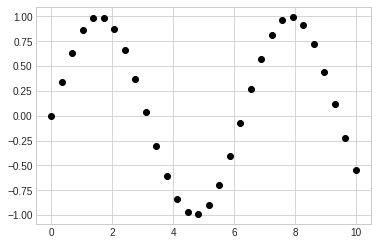

In [8]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black')

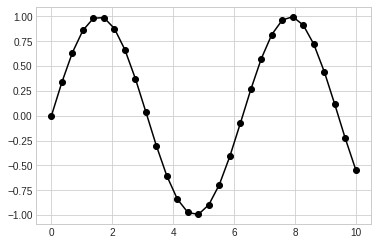

In [9]:
plt.plot(x, y, '-ok');

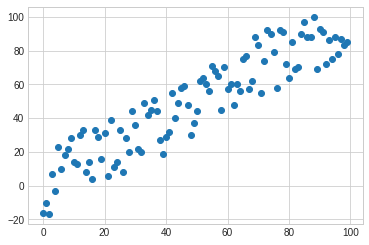

In [10]:
import random


plt.plot(range(100), [random.randint(-20, 20) + i for i in range(100)], linestyle='none', marker='o')
plt.show()

## Умножение матриц

In [0]:
from typing import List


def matrix_mul_py(a: List[List[float]],
               b: List[List[float]]) -> List[List[float]]:

    c = [[0. for _ in range(len(b[0]))] for _ in range(len(a))]
    for i in range(len(a)):
        for j in range(len(b[0])):
            for k in range(len(b)):
                c[i][j] += a[i][k] * b[k][j]

    return c

In [0]:
a = [[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]]
b = [[1., 1., 3., 5.], [4., 2., 6., 7.], [7., 3., 9., 2.]]

assert matrix_mul_py(a, b) == [[30.0, 14.0, 42.0, 25.0], [66.0, 32.0, 96.0, 67.0], [102.0, 50.0, 150.0, 109.0]]

In [0]:
import time


MAX_MATRIX_SIZE = 50_000
N_EPOCHS = 10
SHIFT = 1_000

time_py = []
time_np = []


def count_time(func, matrix_a, matrix_b) -> float:
    time_start = time.time()
    for _ in range(N_EPOCHS):
        func(matrix_a, matrix_b)
    return (time.time() - time_start) / N_EPOCHS
    

for matrix_size in range(1, MAX_MATRIX_SIZE + 1, SHIFT):
    time_py.append(count_time(matrix_mul_py, np.array(a), np.array(b)))
    time_np.append(count_time(np.dot, a, b))

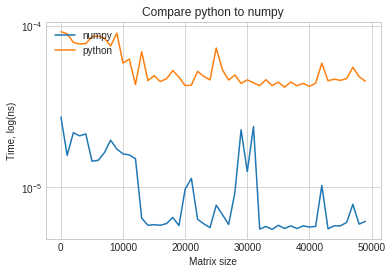

In [14]:
plt.plot(range(1, MAX_MATRIX_SIZE + 1, SHIFT), time_np)
plt.plot(range(1, MAX_MATRIX_SIZE + 1, SHIFT), time_py)
plt.title('Compare python to numpy')
plt.ylabel('Time, log(ns)')
plt.xlabel('Matrix size')
plt.legend(['numpy', 'python'], loc='upper left')
plt.yscale('log')
plt.show()

### Histograms

[Описание](https://www.kaggle.com/c/job-salary-prediction#description)

In [15]:
!curl -L https://www.dropbox.com/s/5msc5ix7ndyba10/Train_rev1.csv.tar.gz?dl=1 -o Train_rev1.csv.tar.gz
!tar -xvzf ./Train_rev1.csv.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  119M  100  119M    0     0  23.8M      0  0:00:05  0:00:05 --:--:-- 32.3M
Train_rev1.csv


In [16]:
data = pd.read_csv("./Train_rev1.csv", index_col=None)
data.shape

(244768, 12)

In [17]:
data.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


(array([1.5610e+03, 1.5732e+04, 3.1647e+04, 3.2884e+04, 3.4391e+04,
        2.9890e+04, 2.4942e+04, 1.7371e+04, 1.3791e+04, 1.0152e+04,
        7.8040e+03, 7.3650e+03, 4.1170e+03, 3.2650e+03, 2.6840e+03,
        1.7440e+03, 2.0650e+03, 1.3500e+03, 9.5400e+02, 7.6300e+02,
        1.3000e+01, 3.5000e+01, 9.0000e+00, 3.9000e+01, 4.0000e+00,
        1.0000e+01, 7.3000e+01, 1.0000e+01, 2.0000e+01, 2.3000e+01,
        1.0000e+01, 3.0000e+00, 2.0000e+00, 5.0000e+00, 1.2000e+01,
        9.0000e+00, 1.0000e+00, 0.0000e+00, 8.0000e+00, 1.0000e+01]),
 array([  5000.,   9875.,  14750.,  19625.,  24500.,  29375.,  34250.,
         39125.,  44000.,  48875.,  53750.,  58625.,  63500.,  68375.,
         73250.,  78125.,  83000.,  87875.,  92750.,  97625., 102500.,
        107375., 112250., 117125., 122000., 126875., 131750., 136625.,
        141500., 146375., 151250., 156125., 161000., 165875., 170750.,
        175625., 180500., 185375., 190250., 195125., 200000.]),
 <a list of 40 Patch objects>)

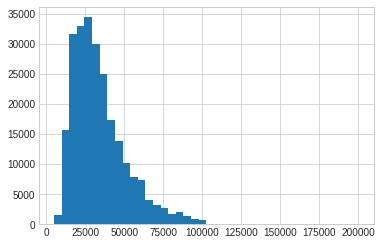

In [18]:
plt.hist(data["SalaryNormalized"], bins=40)

In [0]:
data['Log1pSalary'] = np.log1p(data['SalaryNormalized']).astype('float32')

(array([  447.,   267.,   521.,   617.,  5549., 13073., 19631., 22836.,
        33116., 35581., 36991., 28050., 16408., 17527.,  7096.,  5505.,
         1309.,   135.,    64.,    45.]),
 array([ 8.517393 ,  8.701827 ,  8.886262 ,  9.070696 ,  9.25513  ,
         9.439564 ,  9.623999 ,  9.808433 ,  9.9928665, 10.177301 ,
        10.361735 , 10.546169 , 10.730604 , 10.915038 , 11.099472 ,
        11.283907 , 11.468341 , 11.652775 , 11.837209 , 12.021644 ,
        12.206078 ], dtype=float32),
 <a list of 20 Patch objects>)

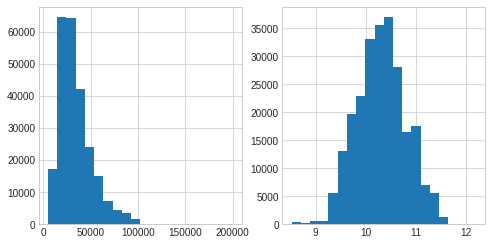

In [20]:
plt.figure(figsize=[8, 4])
plt.subplot(1, 2, 1)
plt.hist(data["SalaryNormalized"], bins=20)

plt.subplot(1, 2, 2)
plt.hist(data['Log1pSalary'], bins=20)

## Kernel Density Estimation


[Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)

In [0]:
import seaborn as sns
sns.set()

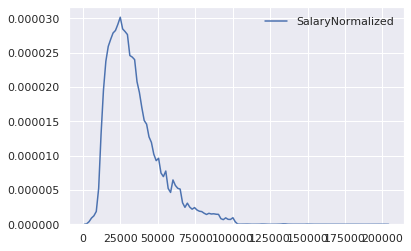

In [22]:
sns.kdeplot(data['SalaryNormalized'])

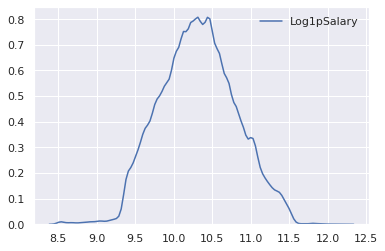

In [23]:
sns.kdeplot(data['Log1pSalary'])

In [24]:
from collections import Counter


companies = list(map(lambda x: x[0], Counter(data['Company']).most_common(6)[1:]))
companies

['UKStaffsearch', 'CVbrowser', 'London4Jobs', 'Hays', 'JAM Recruitment Ltd']

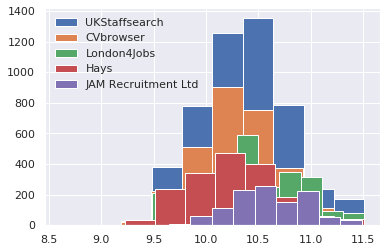

In [25]:
for company in companies:
    plt.hist(data.loc[data['Company'] == company]['Log1pSalary'])

plt.legend(companies, loc='upper left')

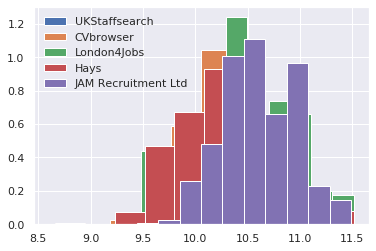

In [26]:
for company in companies:
    plt.hist(data.loc[data['Company'] == company]['Log1pSalary'], density=True)

plt.legend(companies, loc='upper left')

In [0]:
# TODO: Draw a boxplot for this case

In [0]:
# TODO: Print iris scatterplot

## [Bokeh](https://docs.bokeh.org/en/latest/index.html)